<head>
<style>
hr { 
  display: block;
  margin-top: 1em;
  margin-bottom: 0.5em;
  margin-left: auto;
  margin-right: auto;
  border-style: inset;
  border-width: 10px;
} 
    
ul {
border: solid 1px green;
width:800px;
margin:0 auto;
padding: 0;
}
li {
display:inline;
list-style-type:none;
}
div {
border: solid 1px red;
width:900px;
height:50px;
text-align:center;
}

</style>
</head>
<h1><center>IT-TOOLS FOR PHYSICIST 2.0</center></h1>
 <hr width = "50%">  
<h2><center>Machine Learning</center></h2>
<h3><center> Regression and Classification using Keras and Tensorflow</center></h3>


<body >
        In the last lectures we studied the meaning of <b>Machine Learning</b> and in particular we saw what an <b>Artificial Neural Network</b> is, how to implement it and how to exploit it.
            In this lecture we will see how to build <b>models</b> which permit us to perform Linear Regression and Classifications.
   </body>
   
The notebook divided in two sections:<br>
    <ul>
        <li><a href='#Keras'>Keras</a></li>     
        <li><a href=#section2>Tensorflow</a></li>
    </ul>


<h1><center>Keras</center></h1>
<hr width = '50%'><br>
<img src ='./images/keras-logo-2018-large-1200.png'>

<body>
     <i>Keras</i> is an open source library written in Python for Machine Learning purposes. In particular Keras is an high level <b>API</b> for neural networks (Application Programming Interface) which works on Tensorflow.
        This library was developed focusing on the possibility to perform "experiment" in a fast way.</br>
        <ul>
            <li>Keras permits an easy and fast prototipation of the algorithms.</li>
            <li>It supports both Convolutional NN and Recurrent NN, and moreover it permits them combination.</li>
       <li>An important feature of Keras is that with it we don't have to worry on which computation tool you are working on, Keras is written in a such way that it can be compiled on CPU or GPU.</li>
        </ul>
    

More info about Keras: <a href="https://keras.io/"> KERAS </a>

</body>



In [1]:
!pip install keras

In [2]:
import keras
print("Keras version:", keras.__version__)

Using TensorFlow backend.


Keras version: 2.2.4


<a id='section2'></a>
<h1><center> Tensorflow</center></h1>
<hr width = '50%'>
<img src ='./images/logo-color-tensorflow.png'>


Tensorflow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and it is also used for machine learning applications such as neural network.
It has a flexible architecture which allows an easy deplyment of computation across a variety of platform (CPUs,GPUs,TPUs), and from desktops to cluster off servers to mobile and edge devices.
It was originally developed by researchers and engineers from the Google Brain team within Google's AI organization.
More info about TF: <a href="https://www.tensorflow.org/"> TensorFlow </a>

In [1]:
!pip install tensorflow

#### NOTE: If you have an Intel processor, you can download the intel-tensorflow version. It has better performances w.t.r the standard one! 

In [2]:
!pip install intel-tensorflow

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

print("Tensorflow version:",(tf.__version__))

Tensorflow version: 1.14.0


When experimenting with TensorFlow interactively, it's convenient to use <code>tf.InteractiveSession()</code>. Invoking this statement within IPython (an interactive Python Shell) will make TensorFlow behave almost imperatively, allowing beginners to play with tensors much mor easily. You will learn about imperative versus declarative style in greater depth later.

In [5]:
tf.InteractiveSession()

<h3> Initializing Constant Tensors </h3>

In [6]:
tf.zeros(2) #it takes the shape of the tensor, [dim1,....,dimn]


<tf.Tensor 'zeros:0' shape=(2,) dtype=float32>

Note that TF returns a reference to thedesired tensor rather than the value of the tensor itself. To force the value of the tensor ro be returned, we will use the method <code>eval()</code> of the tensor object.

In [7]:
a = tf.zeros(2)
eval = a.eval()
print("The type returned by the method eval() is: ",(type(a.eval())))

The type returned by the method eval() is:  <class 'numpy.ndarray'>


What if we'd like a tensor filled with some quantity besides 1/0? 

In [8]:
tensor = tf.fill((2,2), value = 5.)
tensor.eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

There is a similar method, <code>constant()</code> which allows the construction of tensors that shouldn't change during the program execution.

In [9]:
const_tensor = tf.constant(3., shape = (10,2))
const_tensor.eval()

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)

<h3>Samping Random Tensors </h3>

In [10]:
#Someone can pass as argument the seed in order to have the same sampling
normal_tensor = tf.random_normal((2,2), mean = 0, stddev=1, seed = 42)
normal_tensor.eval()


array([[-0.28077507, -0.1377521 ],
       [-0.6763296 ,  0.02458041]], dtype=float32)

One thing to note is that machine learning systems often make use of very large ten‐
sors that often have tens of millions of parameters. When we sample tens of millions
of random values from the Normal distribution, it becomes almost certain that some
sampled values will be far from the mean. Such large samples can lead to numerical
instability, so it’s common to sample using <code>tf.truncated_normal()</code> instead of <code>tf.ran
dom_normal()</code>. This function behaves the same as <code>tf.random_normal()</code> in terms of
API, but drops and resamples all values more than two standard deviations from the
mean.


In [11]:
norm_trunc_tensor = tf.truncated_normal((10,3), mean = 0, stddev = 1, seed = 42)
norm_trunc_tensor.eval()

array([[-0.28077507, -0.1377521 , -0.6763296 ],
       [ 0.02458041, -0.46845472, -0.00246632],
       [-0.9745911 ,  0.6638492 ,  0.4368011 ],
       [-0.7038976 ,  0.6426843 ,  1.4513893 ],
       [ 1.8412819 , -0.15879929, -1.0607921 ],
       [ 1.5984018 , -0.11424706,  1.4045748 ],
       [-0.05878579, -0.42446467, -0.37023765],
       [-0.5268839 , -0.31035113, -0.59968674],
       [-0.01448264,  1.9438368 , -0.5893153 ],
       [ 1.15643   ,  1.0532719 ,  0.52549994]], dtype=float32)

In [12]:
#Sampling a tensor with a uniformly random entries in a fixed interval
uniform_tensor = tf.random_uniform((2,2), minval = -2, maxval = 2)
uniform_tensor.eval()

array([[ 1.478116 ,  0.921155 ],
       [-1.5133762, -0.9827862]], dtype=float32)

In [13]:
#Adding tensors together
c = tf.ones((2,2)) #return float32
d = tf.fill((2,2), value = 5.)
sum_tensor = c + d
sum_tensor.eval()


array([[6., 6.],
       [6., 6.]], dtype=float32)

Pay attention with the type of tensor you are building

In [14]:
print("tf.ones(): ",(c))
d = tf.fill((2,2), value = 5.)
#or
new_d = tf.to_float(d)
print("tf.fill()", (d))
try_sum = c + d
new_try_sum = c + new_d
new_try_sum.eval()

tf.ones():  Tensor("ones:0", shape=(2, 2), dtype=float32)
Instructions for updating:
Use tf.cast instead.
tf.fill() Tensor("Fill_2:0", shape=(2, 2), dtype=float32)


array([[6., 6.],
       [6., 6.]], dtype=float32)

In [15]:
#Scaling a tensor

c = tf.fill((2,2), value = 2.)
d = tf.fill((2,2,), value = 7.)
scale_tensor = c * d
scale_tensor.eval()

array([[14., 14.],
       [14., 14.]], dtype=float32)

<h3>Matrix operation </h3>

In [16]:
#Creating the identity matrix
identity = tf.eye(4)
identity.eval()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [17]:
#Creating general diagonal matrix

diag = tf.range(1,10,1.) #Creates 1-D tensor
print("Diagonal:",(diag.eval()))

d_tensor = tf.diag(diag)
d_tensor.eval()

Diagonal: [1. 2. 3. 4. 5. 6. 7. 8. 9.]


array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 6., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 7., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 8., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 9.]], dtype=float32)

In [18]:
#Transposing a matrix

matrix = tf.ones((4,2))
print("Matrix:\n",(matrix.eval()))

transp_matrix = tf.matrix_transpose(matrix)
print("Transposed Matrix:\n",(transp_matrix.eval()))

Matrix:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Transposed Matrix:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


<h4>Matrix multiplication </h4>

In [19]:
a = tf.fill((2,3), value = 5.)
b = tf.fill((3,2), value = 6.)
print("a:\n {} \nb:\n {}".format(a.eval(),b.eval()))

c = tf.matmul(a,b)
c.eval()

a:
 [[5. 5. 5.]
 [5. 5. 5.]] 
b:
 [[6. 6.]
 [6. 6.]
 [6. 6.]]


array([[90., 90.],
       [90., 90.]], dtype=float32)

<h4> Tensor shape manipulation </h4>

In [20]:
a = tf.ones(10)
print("a:\n",(a.eval()))
print("a shape:\n",(a.get_shape()))

b = tf.reshape(a,(5,2))

print("b:\n",(b.eval()))
print("b shape:\n",(b.get_shape()))

a:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
a shape:
 (10,)
b:
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
b shape:
 (5, 2)


Notice how we can turn the original rank-1 tensor into a rank-2 tensor and then into
a rank-3 tensor with tf.reshape. While all necessary shape manipulations can be
performed with <code>tf.reshape()</code>, sometimes it can be convenient to perform simpler
shape manipulations using functions such as <code>tf.expand_dims</code> or <code>tf.squeeze</code>.
tf.expand_dims adds an extra dimension to a tensor of size 1. It’s useful for increas‐
ing the rank of a tensor by one (for example, when converting a rank-1 vector into a
rank-2 row vector or column vector). <code>tf.squeeze</code>, on the other hand, removes all
dimensions of size 1 from a tensor. It’s a useful way to convert a row or column vector
into a flat vector.


In [21]:
a = tf.ones(2)
print("a shape:",(a.get_shape()))
print("a:",(a.eval()))
b = tf.expand_dims(a,0) #Expand first dimension
print("b shape:",(b.get_shape()))
print("b:",(b.eval()))
print("Do you notice the difference?")

a shape: (2,)
a: [1. 1.]
b shape: (1, 2)
b: [[1. 1.]]
Do you notice the difference?


In [22]:
a = tf.ones(2)
print("a shape:",(a.get_shape()))
print("a:\n",(a.eval()))
b = tf.expand_dims(a,1) #Expand first dimension
print("b shape:",(b.get_shape()))
print("b:\n",(b.eval()))
print("Do you notice the difference?")

a shape: (2,)
a:
 [1. 1.]
b shape: (2, 1)
b:
 [[1.]
 [1.]]
Do you notice the difference?


In [23]:
d = tf.squeeze(b) #Expand first dimension
print("b shape:",(b.get_shape()))
print("b:\n",(b.eval()))
print("d shape:",(d.get_shape()))
print("d:\n",(d.eval()))


b shape: (2, 1)
b:
 [[1.]
 [1.]]
d shape: (2,)
d:
 [1. 1.]


<h4>Broadcasting </h4>

In [24]:
a = tf.ones((2,2))
print("a:\n",(a.eval()))

b = tf.range(0,2,1, dtype = tf.float32)
print("b:\n",(b.eval()))

print("a shape: {}, b shape: {}".format(a.get_shape(), b.get_shape()))

#Tensorflow permits to add array with different shape (Broadcasting --> Numpy)

c = a + b 
c.eval()



a:
 [[1. 1.]
 [1. 1.]]
b:
 [0. 1.]
a shape: (2, 2), b shape: (2,)


array([[1., 2.],
       [1., 2.]], dtype=float32)

As it can be seen the vector b is added to every row of the matrix a.
Notice: remember to define the tensor with the correct type.

##### TensorFlow session

In TensorFlow, a <code>tf.Session()</code> object stores the context under which a computation
is performed. At the beginning of this chapter, we used <code>tf.InteractiveSession()</code> to
set up an environment for all TensorFlow computations. This call created a hidden
global context for all computations performed. We then used <code>tf.Tensor.eval()</code> to execute our declaratively specified computations. Underneath the hood, this call is
evaluated in context of this hidden global tf.Session. It can be convenient (and
often necessary) to use an explicit context for a computation instead of a hidden context.



In [25]:
sess = tf.Session()

a = tf.ones((2,2))
b = tf.matmul(a,a)

b.eval(session = sess )

array([[2., 2.],
       [2., 2.]], dtype=float32)

The tensor b is evaluated in the context of the session "sess". The same operation che be done using the method <code>run()</code>.

In [26]:
sess.run(b)

array([[2., 2.],
       [2., 2.]], dtype=float32)

##### Tensorflow variables

So far we used constant tensors. While we could combine and recombine these tensors in any way we chose, we could never change the value of tensors themselves (only create new tensors with new values).
The style of programming so far has been <i>functional</i> and not <i>stateful</i>. While functional computations are very useful, machine learning often depens heavily on stateful computations. Learning algorithms are essentially rules for updating stored tensors to explain provided data. If it is not possible to update these stored tensors, it would be hard to learn. 
The <code>tf.Variable()</code> class provides a wrapper around tensors that allows for stateful computations. The variables objects serve as holders for tensors.


In [27]:
var_tensor = tf.Variable(tf.ones((3,3)))

print("Variable tensor: ",(var_tensor))

#var_tensor.eval() Try to evaluate this tensor

Instructions for updating:
Colocations handled automatically by placer.
Variable tensor:  <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32_ref>


The evaluation fails since variables have to be explicitly initialized. 

In [28]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
var_tensor.eval(session = sess)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

###### Assigning values to variables

In [29]:
sess.run(var_tensor.assign(tf.fill((3,3),value = 3.)))

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]], dtype=float32)

What would happen if we tried to assign a value to variable <b>var_tensor</b> of not of shape (3,3)? 

In [30]:
#sess.run(var_tensor.assign(tf.fill((2,2),value = 3.)))

The shape of the variable is fixed upon initilization and must be preserved with updates.

## Linear and Logistic Regression

The model for a linear regression in straightforward:
    $$ y = w x + b $$
Where $w$ and $b$ are the weights and the bias respectively we wish to learn.

In order to solve a given machine learning problem, one must find a way of constructing a function whose minima encode solutions to the real-world problem at hand. These encodings are performed by the <b>loss function</b>. There are several loss functions that can be used for different problems, and each problem has its optimal loss function.
Put another way, the loss function is the mechanism by which a project is transmuted into mathematics.

The loss function $\mathcal{L}$ is a function of the datapoint $x$ and labels $y$, then we have $\mathcal{L(x,y)}$. Note: $x$ and $y$ are in general tensors, and $\mathcal{L}$ maps the pairs of tensors to scalars. 
What should the functional form of the loss function be? The common assumption is to make the loss <i>additive</i>. Suppose that $(x_i,y_i)$ are the data available and that there are N total samples. Then the loss can be decomposed as:
$$\mathcal{L(x,y)} = \sum_{i=1}^{N} \mathcal{L_i(x_i,y_i)} $$

This decomposition allows for many useful advantages. The first is that derivatives factor through addition, so computing the gradient of the total loss simplifies as follows:
$$\nabla\mathcal{L(x,y)} = \sum_{i=1}^{N} \nabla\mathcal{L_i(x_i,y_i)}$$

For regression problem we have the <b>$L^2$ loss </b>.
$$\mathcal{L(x,y)} = || f(x) - y ||_2$$

#### Gradient descent

We have explained that machine learning is the act of minimising suitably defined loss functions. That is, we attempt to find arguments to the loss funciton that minimise it. 
However we recall that $(x,y)$ are fixed quantities that cannot be changed. So, what arguments of $\mathcal{L}$ are we changing during learning?

Defining learnable weights W. Suppose $f(x)$ as a differentiable function we wish to fit with our machine learning model. We will dictate that $f$ is parametrized by choice of W. That is, our function actually has two arguments $f(W,x)$. Fixing the value of W we obtain a function that depends only on datapoints $x$. These learnable weights are the quantities selected by minimisation of the loss function.

But now, supposing we have encoded our learning problem with a suitable loss function, how can we find minima of this loss in practice? The key is the <b>gradient descent</b>.
Suppose $f$ as a function that depends on some weights W. Then $\nabla W$ denotes the direction change in W that would maximally increase $f$. It follows that taking a step in the opposite direction would get us closer to the minima of $f$.

Note: it's convenient to write 
$$\nabla W = \frac{\partial \mathcal{L}}{\partial W}$$.

Then the idea of gradient descent is to find the minima of functionsby repeatedly following the negative gradient. Algorithmically, this update rule can be expressed as:

$$W = W - \alpha\nabla W$$

where $\alpha$ represents the step-size of the updating process, it is called <i>learning rate</i>. Note that $\nabla W$ is itself a function of W, so the actual step changes at each iteration. Each step performs an update to the weights matrix W. This iterative process is called <i>learning</i>

## Perceptron


Proposed in 1958 by Rosenblatt (American psicologist) it is an entity with an input layer $x$, a binary output layer $y$, and a single cell containing the learning algorithm based on the minimization of an error function.
It falls into the class of linear discriminant models through the action of a nonlinear transformation on the input vector. Mathematically:

$$\begin{equation}y(x,w) = f\big{(}\sum_{j=1}^{M} w_{j}\phi_{j}(x)\big{)}\end{equation}$$

Where $x$ is the input vector, $w$ is the adaptive "weights" vector associated with $x$, $y$ is the output and $\phi$ is the fixed (non adaptive) nonlinear funciton of the input. The non linear function. $f(\bullet)$ is given by a step function of the form:

$$\begin{equation} f(a) = \begin{cases} +1, \quad a \ge 0 \\ -1, \quad a \lt 0 \end{cases} \end{equation}$$

For the perceptron it is more convenient to use as target values $t = +1$ for class $C_1$ and $t=-1$ for class $C_2$ which match the choice for the activation function.

# <img style="text-align: left" src="./images/perceptron.png" width="40%" />



The algorithm used to determine the adaptive parameters $w$ relies on the minimization of an appropriate error function. A natural choice of error function would be the total number of misclassified patterns. However this does not lead to a simple learning algorithm. We will use the **perceptron criterion**. We are seeking for an error function such that patterns $x_n$ in class $C_1$ will have $w^{T}\phi(x_n) \gt 0$ whereas patterns in class $C_2$ have $w^{T}\phi(x_n) \lt 0$. Using the $t \in {-1, +1}$ target coding it naturally follows that we would like that for all patterns $x_n$   :   $w^{T}\phi(x_n)t_n \gt 0$. Therefore the perceptron criterion associates zero with each pattern correctly classified whereas for a misclassified pattern $x_n$ it tries to minimize the error function:

$$\begin{equation}E_{P}(w) = - \sum_{n \in M} w^{T}\phi(x_n)t_{n} \end{equation}$$

Where $M$ denotes the set of all misclassified patterns. The error function is a linear function of the weights in the region of misclassification and 0 in the region of a correct classification and therefore it is piecewise linear.
This is really important for the next part. 

Suppose we randomly choose our initial weight vector and then compute the error function associated, how can the machine adapt the weight vector for the best possible classification of patterns $x_n$? . The technique used for the weight update is called **Stochastic gradient descent**. Given $w^{\tau}$ the weight vector at the $\tau$ iteration then:

$$\begin{equation} w^{\tau + 1} = w^{\tau} -\eta\nabla E_P(w) = w^{\tau} + \eta \phi_{n}t_{n} \end{equation}$$

Where $\eta$ is the learning rate parameter, it sets the precision of our model to find the minimum of the error function but maximize the convengerce time. Large $\eta$ means big steps, less precision but few iterations. On the other hand a small $\eta$ means good approximation of the minimum of the error function but more iterations and more computational time. Note that as the iteration goes on the set of misclassified patterns $M$ will change with the vector $w$. The learning algorithm of the perceptron is fairly simple and it can be visualized in the following picture:

# <img style="text-align: left" src="./images/perceptron_alg.jpg" width="40%" />

The perceptron is the logic unit we will use to build our models. In order to implement a perceptron or a multi-layer perceptron is important to understand the logic bearing behind. For this purpose is important to understand the computational graphs. These graphs are the representation of the implementation of the algorithm. for example: given 3 input variables, the computational graphs of the function
$$f(x) = sign(\sum_i w_ix_i + b$$
is the following:
# <img style="text-align: left" src="./images/computational_graphs.png" width="40%" />

Where: <ol>
    <li> White nodes correspond to input and outputs; </li>
    <li> Red nodes correspond to model parameters; </li>
    <li> Blue nodes correspond to intermediate operations. </li>
    </ol>
 
Clearly, in terms of tensor operation, f can be rewritten as:
$$f(x) = sign(\textbf{w}^T\textbf{x}) + b$$
for which the correspondingcomputational graphs of f is:
<img style="text-align: left" src="./images/computational_graphs_vec.png" width="40%" />

We have now to implement our algorithm, following these computational graphs.

### Toy dataset with numpy

In [31]:
#Generating a dataset with numpy.
import numpy as np

N = 1000

w = 5
b = 2
noise = 0.2

x = np.random.rand(N,1) #Random values from uniform distrib in [0,1]
ns = np.random.normal(scale = noise, size = (N,1))

y = np.reshape(w*x + b + ns, (-1))


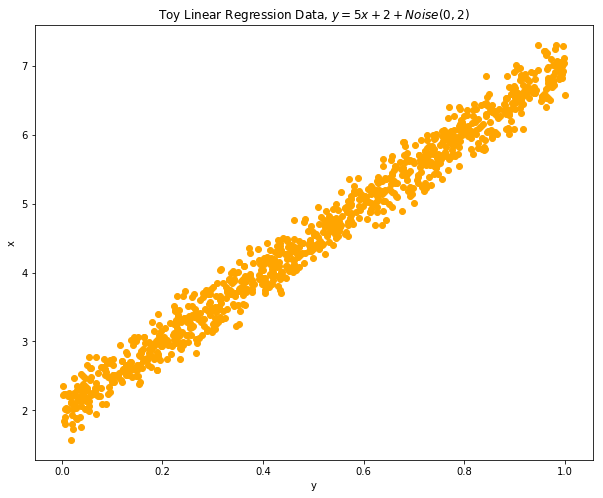

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
plt.scatter(x,y,color = 'orange')
plt.xlabel("y")
plt.ylabel("x")
plt.title("Toy Linear Regression Data, "
        r"$y = {}x + 2 + Noise(0, {})$".format(w,b,ns))
plt.show()

#### Placeholders

A placeholder is a way to put information into a tensorflow computation graph. 

In [33]:
ph = tf.placeholder(tf.float32, shape = (2,2))
ph

<tf.Tensor 'Placeholder:0' shape=(2, 2) dtype=float32>

Recall that in TF we can evaluate tensors by using sess.run(var). How do we feed in values for placeholders in our TF computations? 
We can build <i>feed dictionaries</i>. These are python dictionaries that map TF tensors to np.ndarray objects that contain the concrete values for these placeholders. This is best viewed as an inout to a TF computation graph. And the output?
TF calls these output <i>fetches</i>. 

In [34]:
a = tf.placeholder(tf.float32, shape = (2,))
b = tf.placeholder(tf.float32, shape = (2,))
c = a + b

x = np.array([1.,2.])
y = np.array([2.,3.])
with tf.Session() as sess:
    dic = {a : x, b: y}
    c_eval = sess.run(c, dic) #broadcasting
    print(c_eval)

[3. 5.]


#### Name scopes

In complicated TF programs, there will be many tensors, variables and placehoders defined. <code>tf.name_scope(name)</code> provides a simple scoping mechanism for managing these collections of variables. All the computational graph elements created within the scope of <code>tf.name_scope(name)</code> call will have <b>name</b> prepended to their names.

In [35]:
N = 10

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N,1))
    y = tf.placeholder(tf.float32, (N,))

x

<tf.Tensor 'placeholders/Placeholder:0' shape=(10, 1) dtype=float32>

### Optimizers

The missing piece is that we still don't know how to perform gradient descent using TF. 
TF provides a collection of optimization algorithms in the <code>tf.train</code> module. These algorithms can be added as nodes to the TF computation graph.

In [36]:
W = tf.fill((10,10), value = 1.)

red_sum = tf.reduce_sum(W)
red_sum.eval()

100.0

In [37]:
learning_rate = .001
W = tf.Variable((10.,))
l = tf.reduce_sum(W)
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)

### Taking gradients with TensorFlow

We can directly implement gradient descent algorithms in TF.

In [38]:
W = tf.fill((3,3),value = 3.)
l = tf.reduce_sum(W)
gradW = tf.gradients(l,W)
print("Gradient object:", (gradW))
print("Type: ",(type(gradW)))
print("Gradient computed:\n ",(gradW[0].eval()))

Gradient object: [<tf.Tensor 'gradients/Sum_2_grad/Tile:0' shape=(3, 3) dtype=float32>]
Type:  <class 'list'>
Gradient computed:
  [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


This piece of code symbolically pulls down the gradients of loss <i>l</i> with respect to learnable parameter (<code>tf.Variable</code>)W. 
<code>tf.gradients</code> returns a list of the desired gradients. Note that the radients are themselves tensors! 
TF performs symbolic differentiation, which means that gradients themselves are parts of the computational graph.

Gettin a visual understanding of the structure of a tensorial program can be very useful. The TF team provides the TensorBoard package for this purpose. TensorBoard starts a web servers that displays various useful visualizations of a TensorFlow program. However, in order for TF programs to be inspected with TensorBoard, programmers must manually write logging statements. <code>tf.train.FileWriter()</code> speifies the logging directory for a TensorBoard program, and <code>tf.summary</code> writes sumaries of various TensorFlow variables to the specified loggign directory. We will use <code>tf.summary.scalar</code> which sumarizes a scalar quantity, to track the value of the loss function. <code>tf.summary.merge_all()</code> is a useful logging aid that merges myltiple summaries into a single summary for convenience.

In [39]:
with tf.name_scope("summaries"):
    
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter("./Output/lr-train", tf.get_default_graph())

##### Training models with TF

Suppose now that we have specified placeholders for datapoints and labels, and have defined a loss with tensorial operations. We have added an optimizer node <code>train_op</code> to the computational graph, which we can use to perform gradient descent steps.
To perform iteratively the gradient descent we can use a for-loop. 


In [40]:
#Generating a dataset with numpy.
import numpy as np
import tensorflow as tf

N = 1000

w = 5
b = 2
noise = 0.2

x_np = np.random.rand(N,1) #Random values from uniform distrib in [0,1]
ns = np.random.normal(scale = noise, size = (N,1))

y_np = w*x_np + b + ns



In [41]:
tf.reset_default_graph()

with tf.name_scope("placeholders"):
    
    x = tf.placeholder(tf.float32, (N,1)) #tensor for the x-variable
    y = tf.placeholder(tf.float32, (N,1)) #tensor for the y-variable
    
with tf.name_scope("weights"):
    
    W = tf.Variable(tf.random_uniform((1,1), minval=-0.1, maxval=0.1)) #Weights
    b =  tf.Variable(tf.random_uniform((1,), minval=-0.1, maxval=0.1)) #bias
    
with tf.name_scope("prediction"):
    
    y_pred = tf.matmul(x,W) + b #prediction
    
with tf.name_scope("loss"):
    
    #l = tf.reduce_sum((y - y_pred)**2)
    l = tf.losses.mean_squared_error(labels=y, predictions=y_pred) / 2. #loss function
    
with tf.name_scope("optim"):
    
    train_op = tf.train.AdamOptimizer(.001).minimize(l) #train operation
    
with tf.name_scope("summaries"):
    
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter('./Output/lr-train1', tf.get_default_graph())

In [42]:
n_steps = 10000

loss = []

with tf.Session() as sess1:
    
    sess1.run(tf.global_variables_initializer())
    #print(tf.global_variables_initializer())
    
    for i in range(n_steps):
        
        feed_dict = {x: x_np, y: y_np}
        
        _,summary,loss_v = sess1.run([train_op, merged, l], feed_dict = feed_dict)
        #print("step %d, loss: %f" % (i,loss))
         
        loss.append(loss_v)
        train_writer.add_summary(summary,i)
   
    
    out = sess1.run([y_pred], feed_dict = {x: x_np})    
   
    #print(type(out))
    
    

In [43]:
#!tensorboard --logdir=./Output/lr-train1

<img style="text-align: left" src="./images/logic_reg.png" width="70%" />

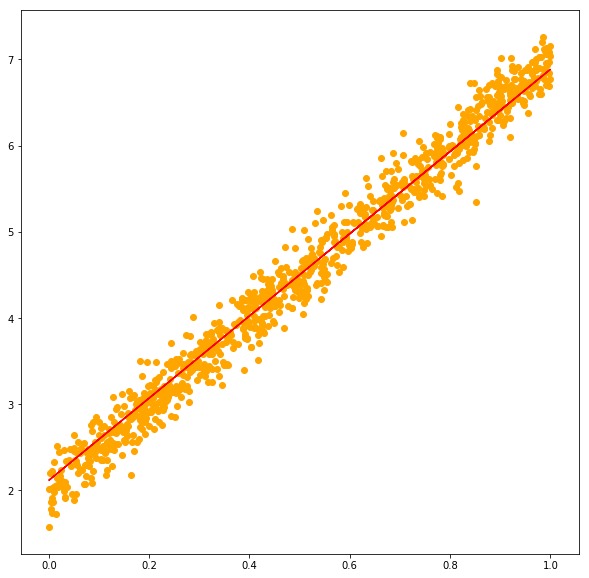

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.plot(x_np, out[0], color = 'red')
plt.scatter(x_np,y_np, color = 'orange')
plt.show()

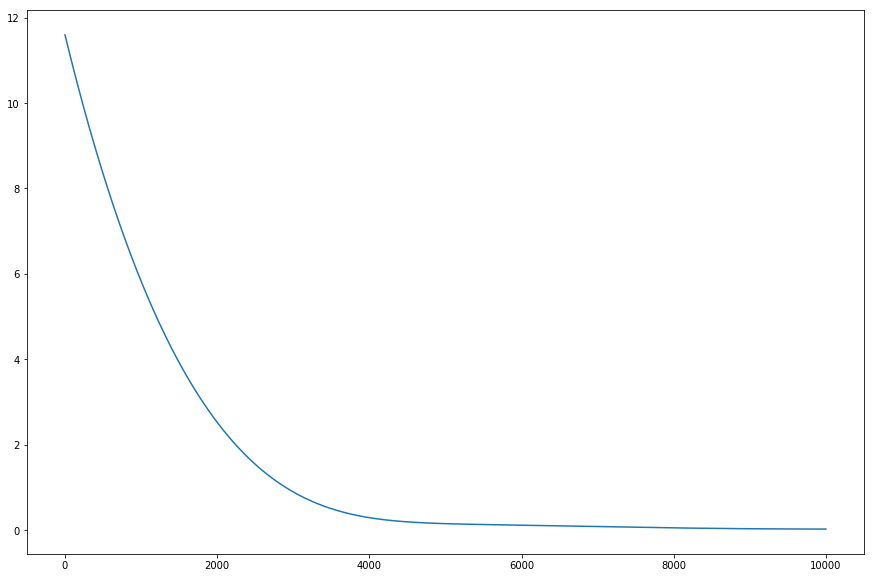

In [45]:
fig = plt.figure(figsize = (15,10))
plt.plot(loss)

### Logistic Regression

In statistics, the logistic model (or logit model) is a widely used statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail, win/lose, alive/dead or healthy/sick; these are represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each dependent variable having its own parameter; for a binary independent variable this generalizes the odds ratio. 

#### Creating the toy dataset

In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

N = 2000

x_zeros = np.random.multivariate_normal(
                            mean = np.array((-1,0)), cov = 0.1*np.eye(2), size = (N,))

y_zeros = np.zeros((N,))

x_ones = np.random.multivariate_normal(
                            mean = np.array((0.7,0)), cov = 0.1*np.eye(2), size = (N,))

y_ones = np.ones((N,))


x_np = np.vstack([x_zeros,x_ones])

y_np = np.concatenate([y_zeros,y_ones])

An important thing to remember when implementing a machine learning algorithm is the generalization of the solution. We want that the solution can solve the most generic problem. That's why is important to ensure that the algorithm can generalize the solution on a new dataset, called <b>validation dataset</b>. This dataset dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters(e.g. the number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. For this purpose sklearn provides a very useful method: <code>train_test_split</code>. A standard choice is to keep 1/3 of the entire dataset for validation purposes. 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_np, y_np, test_size=0.3)

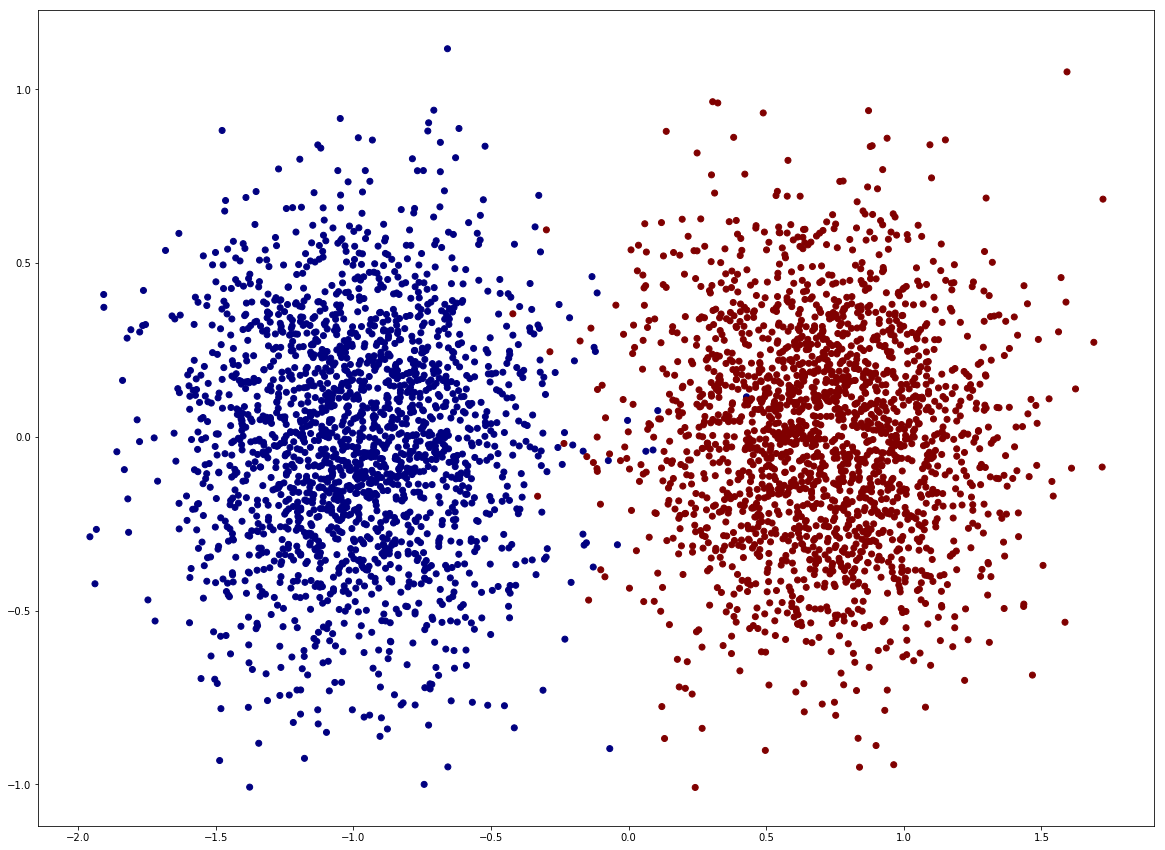

In [48]:
fig = plt.figure(figsize = (20,15))
plt.scatter(x_np[:,0],x_np[:,1], c = y_np, cmap = "jet")



### Model creation

In [49]:
tf.reset_default_graph()

with tf.name_scope("placeholders"):
    
    x = tf.placeholder(tf.float32, (None,2))
    y = tf.placeholder(tf.float32, (None,))
    
with tf.name_scope("weights"):
    
    W = tf.Variable(tf.random_normal((2,1)))
    b = tf.Variable(tf.random_normal((1,)))
    
with tf.name_scope("prediction"):
    
    y_logit = tf.squeeze(tf.matmul(x,W) + b) #Squeeze one dimension
    
    y_one_prob = tf.sigmoid(y_logit)
    
    y_pred = tf.round(y_one_prob)
    
with tf.name_scope("loss"):
    
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_logit, labels = y)
    
    l = tf.reduce_sum(entropy)
    
with tf.name_scope("optim"):
    
    train_op = tf.train.AdamOptimizer(.01).minimize(l)
    
    train_writer = tf.summary.FileWriter('./Output/logistic-train', tf.get_default_graph())
    
with tf.name_scope("summaries"):
    
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()

Instructions for updating:
Use tf.cast instead.


In [50]:
n_steps = 5000

from tqdm import tqdm_notebook
pbar = tqdm_notebook(range(n_steps), desc = "Epochs")

from sklearn.metrics import accuracy_score
from scipy.special import logit

loss_val = []

loss_test = []
with tf.Session() as sess_log:
    
    sess_log.run(tf.global_variables_initializer())
    
    for i in range(n_steps):
        
        dicti = {x: X_train, y: Y_train}
        
        dict_test = {x: X_test, y: Y_test}
        
        _,summary,loss = sess_log.run([train_op,merged,l], feed_dict = dicti)
        
        if(i % 20):
            
            summary_t,loss_t = sess_log.run([merged,l], feed_dict = dict_test)
            
            loss_test.append(loss_t)
            
        loss_val.append(loss)
        
        
        train_writer.add_summary(summary,i)
        
        pbar.update()
        
    
    w_final, b_final = sess_log.run([W, b])

    # Make Predictions
    y_pred_np = sess_log.run(y_pred, feed_dict={x: x_np})
    
    pbar.close()
    

    score = accuracy_score(y_np, y_pred_np)
    print("Classification Accuracy: %f" % score)

sess_log.close()





Classification Accuracy: 0.995000


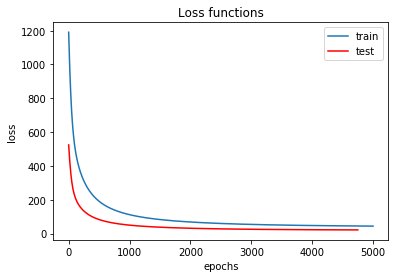

In [51]:
plt.plot(loss_val, label = 'train')
plt.plot(loss_test, color = 'red',  label = 'test')
plt.title("Loss functions")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

<Figure size 432x288 with 0 Axes>

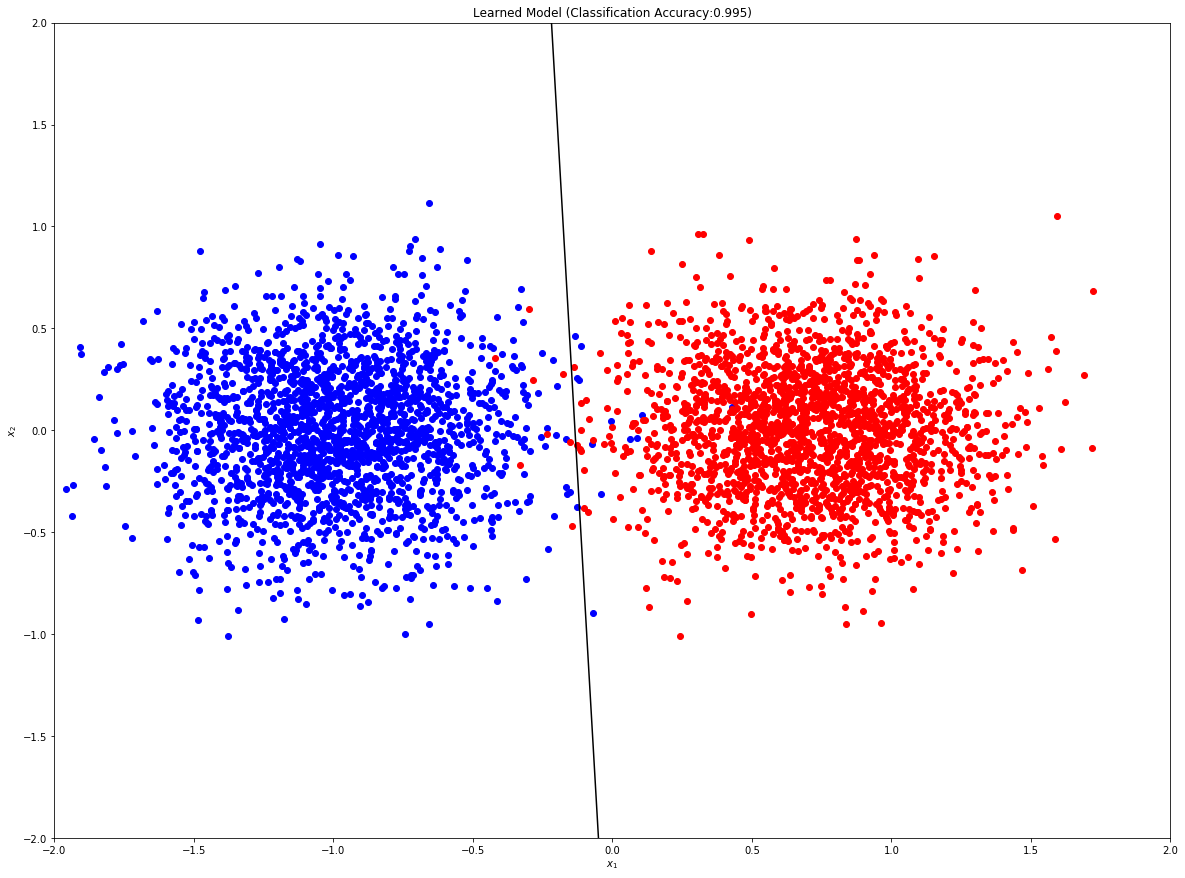

In [52]:
plt.clf()
# Save image of the data distribution
fig = plt.figure(figsize = (20,15))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Learned Model (Classification Accuracy:{})".format(score))
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Plot Zeros
plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")

x_left = -2
y_left = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_left)

x_right = 2
y_right = (1./w_final[1]) * (-b_final + logit(.5) - w_final[0]*x_right)
plt.plot([x_left, x_right], [y_left, y_right], color='k')


In [53]:
#!tensorboard --logdir=./Output/logistic-train

<a id='Graph'></a>
<h1><center>Graph</center></h1>
<hr width = '50%'><br>
<img src ='./images/logic_reg.png'>

# Generate a dataset and plot it


In [54]:
# Generate a dataset and plot it
import sklearn.datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from scipy.special import logit

from sklearn.preprocessing import StandardScaler

print("Tensorflow version:",(tf.__version__))
#np.random.seed(0)
X_d, y = sklearn.datasets.make_moons(10000, noise=0.1)

sc = StandardScaler()

X = sc.fit_transform(X_d)



Tensorflow version: 1.13.1


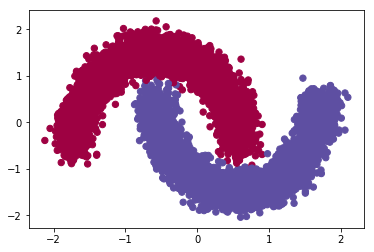

In [55]:
plt.scatter(X[:,0], X[:,1], s=40, c=y.reshape(-1,), cmap=plt.cm.Spectral)

In [56]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [57]:
print("X_train shape: {} \nY_train shape: {} ".format(X_train.shape, Y_train.shape))


X_train shape: (7000, 2) 
Y_train shape: (7000,) 


In [58]:
n_hidden = 70
n_lay = 2

tf.reset_default_graph() #In order to permit us to instantiate new variables
    #d = len(X_train)

with tf.name_scope("placeholders"):

    x = tf.placeholder(tf.float32, (None,2))

    y = tf.placeholder(tf.float32, (None,))


with tf.name_scope("hidden-layer"):


    
    for lay in range(0,n_lay):
        
        if(lay == 0):
            
            W = tf.Variable(tf.random_normal((2,n_hidden)))

            b = tf.Variable(tf.random_normal((n_hidden,)))

            out_hidd = tf.nn.relu(tf.matmul(x,W) + b) #(600)

            W = tf.Variable(tf.random_normal((n_hidden,n_hidden)))

            b = tf.Variable(tf.random_normal((n_hidden,)))            
            
        
        out_hidd = tf.nn.relu(tf.matmul(out_hidd,W) + b)      
        


with tf.name_scope("output"):

    W = tf.Variable(tf.random_normal((n_hidden,1)))

    b = tf.Variable(tf.random_normal((1,)))

    y_logit = tf.matmul(out_hidd,W)+b

    y_one_prob = tf.sigmoid(y_logit)

    y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):

    y_expand = tf.expand_dims(y,1)

    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_logit, labels = y_expand)

    l = tf.reduce_sum(entropy)

with tf.name_scope("optim"):

    train_op = tf.train.AdamOptimizer(0.001).minimize(l)

with tf.name_scope("summaries"):

    tf.summary.scalar("loss",l)

    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('./Output/nn-train', tf.get_default_graph())






In [59]:
from tqdm import tqdm_notebook

    
import imageio
images = []


loss_train = []
loss_test = []

acc_train = []
acc_test = [] 

n_steps = 200

pbar = tqdm_notebook(range(n_steps), desc = "Epochs")


with tf.Session() as fcnn:
    
    fcnn.run(tf.global_variables_initializer())
    
    for i in range(0,n_steps):          

        dicti_train = {x: X_train, y:Y_train} #Train dict

        _,summary,loss = fcnn.run([train_op,merged,l], feed_dict = dicti_train) #Running the train
        
        dicti_test = {x: X_test, y: Y_test} #Test dict
        summary_t, loss_t = fcnn.run([merged,l], feed_dict=dicti_test) #Running the test     
        
        #Loss functions
        loss_train.append(loss)
        loss_test.append(loss_t)
        train_writer.add_summary(summary,i)       
        
        #Making predictions    
        y_pred_train = fcnn.run(y_pred, feed_dict={x: X_train})
        score_train = accuracy_score(Y_train, y_pred_train) #Computing the accuracy   

        pbar.update()


        #if(i % 10 == 0): #One can decide not to test every epoch but after a few ones. (Rembember to indent)
        
        #Making predictions on the test dataset in order to compute the accuracy every step.
        y_pred_test = fcnn.run(y_pred, feed_dict={x: X_test}) 
        score_test = accuracy_score(Y_test, y_pred_test) #Computing the accuracy on the test dataset

        acc_train.append(score_train) 
        acc_test.append(score_test)

    w_final, b_final = fcnn.run([W, b]) #Saving the final results
    
    # Make Predictions on test
    y_pred_test = fcnn.run(y_pred, feed_dict={x: X_test}) #Final predictions
    
    y_proba = fcnn.run(y_one_prob, feed_dict = {x:X_test}) #Final predictions (probability)
    

    
    score = accuracy_score(Y_test, y_pred_test)
    print("Classification Accuracy: %f" % score)
fcnn.close() #Closing the session.



Classification Accuracy: 0.998667


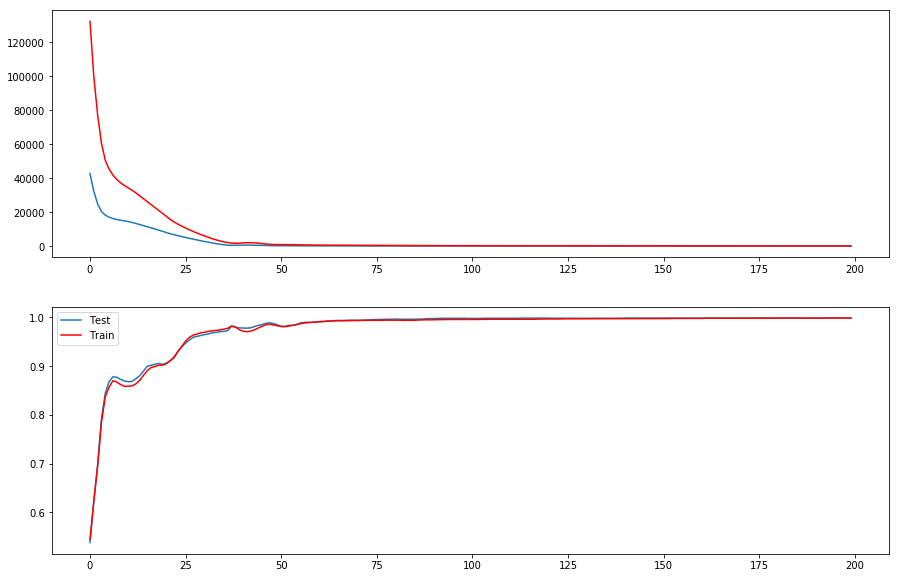

In [60]:
fig = plt.figure(figsize = (15,10))

plt.subplot(211)

plt.plot(loss_test, label = 'Test')
plt.plot(loss_train, color = 'red', label = 'Train' )

plt.subplot(212)

plt.plot(acc_test, label = 'Test')
plt.plot(acc_train, color = 'red', label = 'Train')

plt.legend()
plt.show()

## Confusion matrix

A useful explanation of the confusion matrix can be found here: <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62"> Confusion Matrix </a>

In [61]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (15,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.99732977 0.00267023]
 [0.         1.        ]]


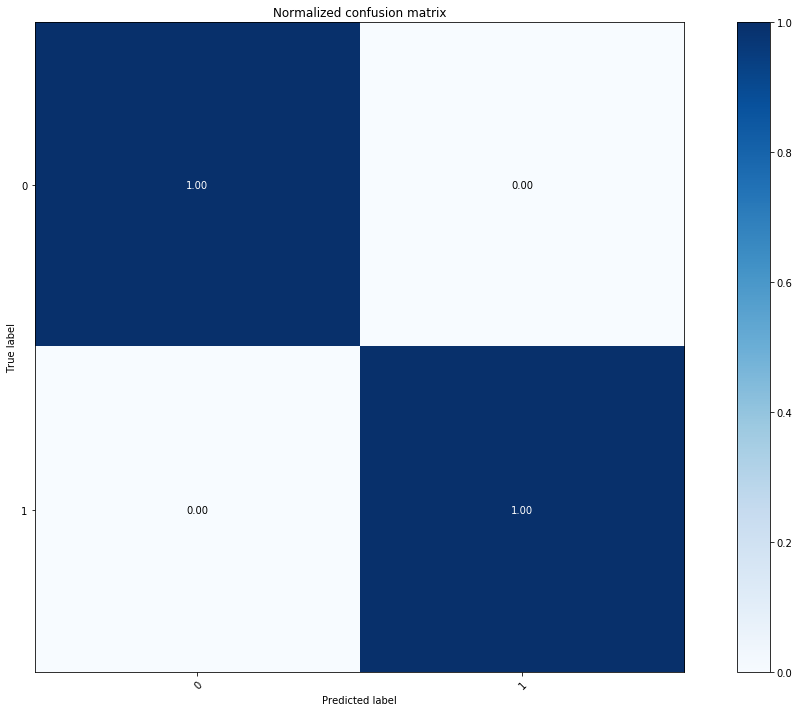

In [62]:
y_pred = y_pred_test.reshape(-1)
y_pred = y_pred.astype(int)
plot_confusion_matrix(Y_test,y_pred,classes = [0,1],normalize=True)

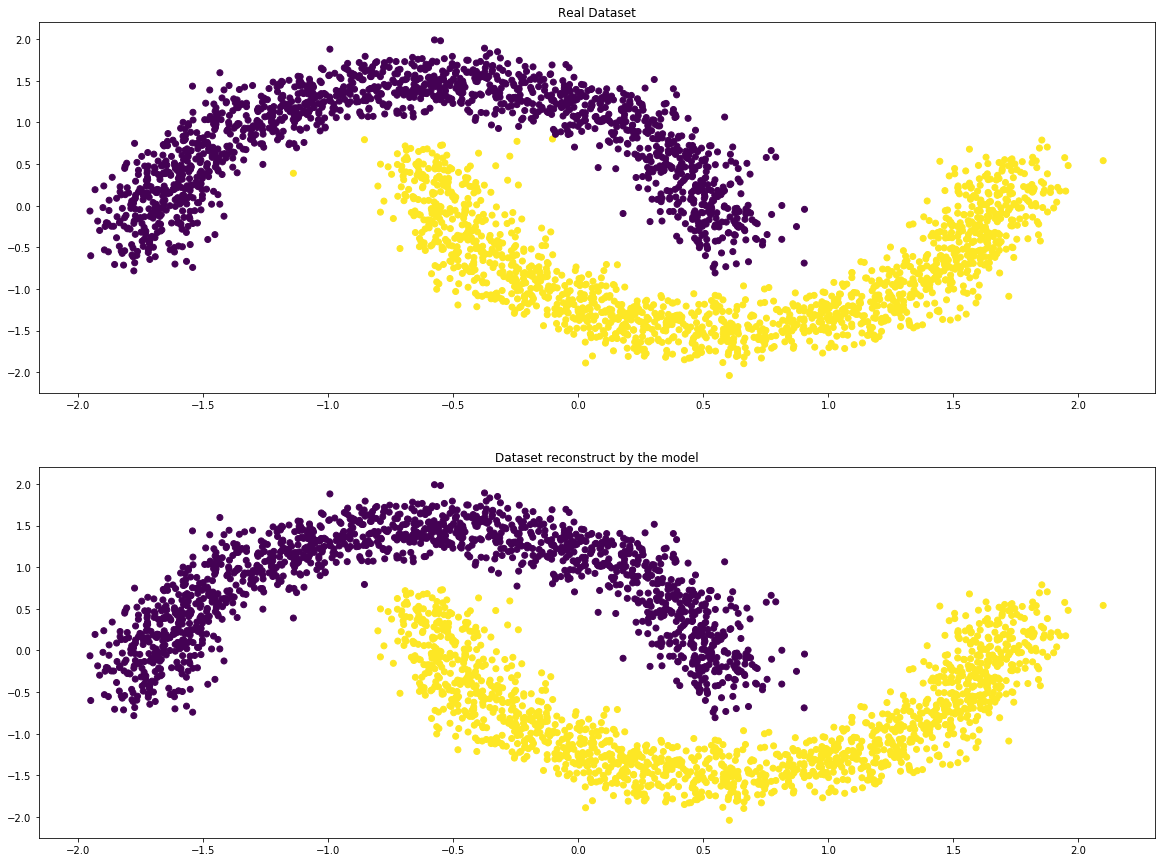

In [63]:
fig = plt.figure(figsize = (20,15))

ax1 = plt.subplot(211)

plt.scatter(X_test[:,0], X_test[:,1], c = y_pred_test.reshape(-1))

ax2 = plt.subplot(212)

plt.scatter(X_test[:,0],X_test[:,1], c = Y_test) 
ax1.title.set_text('Real Dataset')
ax2.title.set_text('Dataset reconstruct by the model')


In [64]:
!tensorboard --logdir=./Output/nn-train

W0806 10:29:56.621058 140066162169600 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0806 10:29:56.621572 140066162169600 plugin_event_accumulator.py:302] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
TensorBoard 1.13.1 at http://T470-wa:6006 (Press CTRL+C to quit)
^C


<a id='Graph'></a>
<h1><center>Graph</center></h1>
<hr width = '50%'><br>
<img src ='./images/MLP.png'>

## Regularization

#### Neural network memorize - Overfit

One of the striking aspects about fully connected networks is that they tend to memorize the training data given enough time. As a result, traininga FCN to convergence isn't really a meaningful metric. 
For large enough networks, it is quite common for training loss to trend all the way to zero. This empirical observation is one of the most pratical demonstrations of the universal approximation capabilities of FCN. 
Note that training loss trending to zero does not mean that the network has learned a more powerful model It is rather likely that the model has started to memorize peculiarities of the training set that are not applicable to any other datapoints.

Controlling networks and preventing them from misbehaving in this fashion is critical for modeling success.

Regularization is the general statistical term for a mathematical operation that limits memorization while promoting a generalizable learning. There are many different types of regularization available.

## Dropout

Dropout is a form of regularization that randomly drops some proportion of the nodes that feed into a fully connected layer. That means that the contribution of the dropped node to the corresponding activation function is set to 0. In this way the gradients for dropped nodes drop to zero as well. 
The nodes to be dropped are chosen at random during each step of gradient descent. The principle is that the network will be forced to avoid co-adaption. Briefly: suppose that one neuron in a deep network has learned a useful representation, then other deeper neurons will rapidly learn to depend on that particular neuron for information. This process will render the network brittle since the network will depend ecxcessively on the features learned by that neurons, which might represent a small part of the dataset, insted of learning a general rule.
Dropout prevents this type of co-adaption because it will no longer be possible to depend on the presence of single powerful neurons, in this way the other neurons will be forced to learn useful representations as well.

Dropout prevents the network from memorizing the training dta, the loss will no longer tend rapidly toward 0. And then they tends to slightly boost the predictive power of the model on new data.

REMEMBER TO TURN OFF THE DROPOUT WHEN MAKING PREDICTIONS!

#### Adding dropout to a hidden layer

TF takes care of implementing dropout in the built-in <code> tf.nn.dropout(x,keep_prob) </code> where <i>keep_prob</i> is the probability that any given node is kept. We need a new placeholders.

In [65]:
n_hidden = [70,70,70,70,70]
n_lay = len(n_hidden)

tf.reset_default_graph() #In order to permit us to instantiate new variables
    #d = len(X_train)


with tf.name_scope("placeholders"):

    x = tf.placeholder(tf.float32, (None,2))

    y = tf.placeholder(tf.float32, (None,))

    keep_prob = tf.placeholder(tf.float32) #Keep prob!

with tf.name_scope("hidden-layer"):


    
    for lay in range(0,n_lay):
        
        if(lay == 0):
            
            W = tf.Variable(tf.random_normal((2,n_hidden[0])))

            b = tf.Variable(tf.random_normal((n_hidden[0],)))

            out_hidd = tf.nn.relu(tf.matmul(x,W) + b) #(600)
            
            out_hidd = tf.nn.dropout(out_hidd, keep_prob)
        
        else:

            W = tf.Variable(tf.random_normal((n_hidden[lay-1],n_hidden[lay])))

            b = tf.Variable(tf.random_normal((n_hidden[lay],)))




            out_hidd = tf.nn.relu(tf.matmul(out_hidd,W) + b)
            #out_hidd = tf.nn.dropout(out_hidd, keep_prob)
        


with tf.name_scope("output"):

    W = tf.Variable(tf.random_normal((n_hidden[-1],1)))

    b = tf.Variable(tf.random_normal((1,)))

    y_logit = tf.matmul(out_hidd,W)+b

    y_one_prob = tf.sigmoid(y_logit)

    y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):

    y_expand = tf.expand_dims(y,1)

    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = y_logit, labels = y_expand)

    l = tf.reduce_sum(entropy)

with tf.name_scope("optim"):

    train_op = tf.train.AdamOptimizer(0.001).minimize(l)

with tf.name_scope("summaries"):

    tf.summary.scalar("loss",l)

    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('./Output/nn-train', tf.get_default_graph())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
from tqdm import tqdm_notebook

    
import imageio
images = []


loss_train = []
loss_test = []

acc_train = []
acc_test = [] 

n_steps = 500

pbar = tqdm_notebook(range(n_steps), desc = "Epochs")


with tf.Session() as fcnn:
    
    fcnn.run(tf.global_variables_initializer())
    
    for i in range(0,n_steps):          

        dicti_train = {x: X_train, y:Y_train, keep_prob : 0.9} #Train dict

        _,summary,loss = fcnn.run([train_op,merged,l], feed_dict = dicti_train) #Running the train
        
        dicti_test = {x: X_test, y: Y_test, keep_prob : 1} #Test dict
        summary_t, loss_t = fcnn.run([merged,l], feed_dict=dicti_test) #Running the test     
        
        #Loss functions
        loss_train.append(loss)
        loss_test.append(loss_t)
        train_writer.add_summary(summary,i)       
        
        #Making predictions    
        y_pred_train = fcnn.run(y_pred, feed_dict={x: X_train, keep_prob : 0.9})
        score_train = accuracy_score(Y_train, y_pred_train) #Computing the accuracy   

        pbar.update()


        #if(i % 10 == 0): #One can decide not to test every epoch but after a few ones. (Rembember to indent)
        
        #Making predictions on the test dataset in order to compute the accuracy every step.
        y_pred_test = fcnn.run(y_pred, feed_dict={x: X_test, keep_prob : 1}) 
        score_test = accuracy_score(Y_test, y_pred_test) #Computing the accuracy on the test dataset

        acc_train.append(score_train) 
        acc_test.append(score_test)

    w_final, b_final = fcnn.run([W, b]) #Saving the final results
    
    # Make Predictions on test
    y_pred_test = fcnn.run(y_pred, feed_dict={x: X_test, keep_prob: 1}) #Final predictions
    
    y_proba = fcnn.run(y_one_prob, feed_dict = {x:X_test, keep_prob: 1}) #Final predictions (probability)
    

    
    score = accuracy_score(Y_test, y_pred_test)
    print("Classification Accuracy: %f" % score)
fcnn.close() #Closing the session.



Classification Accuracy: 0.998000


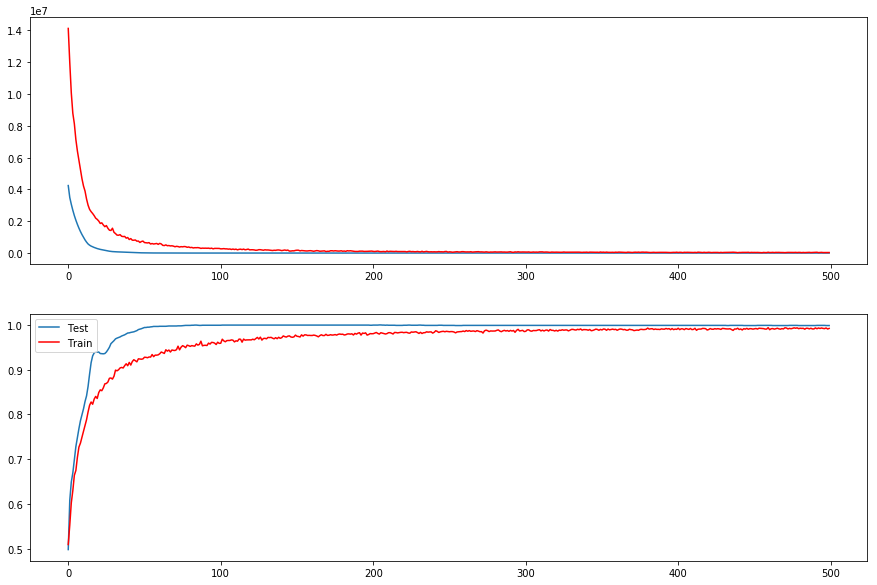

In [67]:
fig = plt.figure(figsize = (15,10))

plt.subplot(211)

plt.plot(loss_test, label = 'Test')
plt.plot(loss_train, color = 'red', label = 'Train' )

plt.subplot(212)

plt.plot(acc_test, label = 'Test')
plt.plot(acc_train, color = 'red', label = 'Train')

plt.legend()
plt.show()

In [68]:
#!tensorboard --logdir=./Output/nn-train

<a id='Keras'></a>
# KERAS 

Tensorflow and PyThorch permit to develop customised models following step by step the train chain. For a more simple use one can use keras, that has a more simple sintax. Keras is also very customizable and permit to add regularization in a very fast way. Let's see how to use Keras on a physical problem. 
This problem is a classification problem. We have two different dataset, one for the signal process and one for the background process. The purpose of the analysis is to train a model for the discrimination of signal and background events. 

In [ ]:
import pandas as pd
import seaborn as sns #useful for statistical data visualization
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.special import logit
from sklearn.preprocessing import StandardScaler

signal_file = './Data/Signal.npy' #Signal dataset
bkg_file = './Data/Background.npy' #Background dataset
s_header_file = './Data/Signal_var.npy' #Signal variables names
b_header_file = './Data/Background_var.npy' #Background variables names.

#Simple function that returns the features dataset and the target one (label = signal, background (1,0))
def to_xy(df,target):
    y = df[:,target]
    x = np.delete(df, target, 1)
    return x,y


In [ ]:
S = np.load(signal_file)
B = np.load(bkg_file)
S_header = np.load(s_header_file)[0,:-1]
B_header = np.load(b_header_file)[0,:-1]
dataset = np.vstack([S,B])
np.random.shuffle(dataset)
train,target = to_xy(dataset,dataset.shape[1]-1)

## Some plots

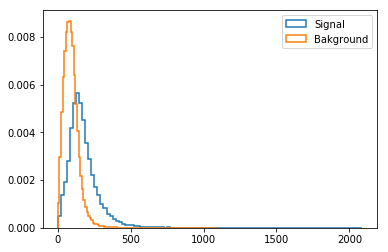

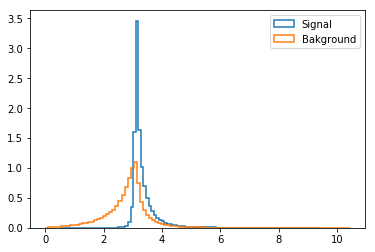

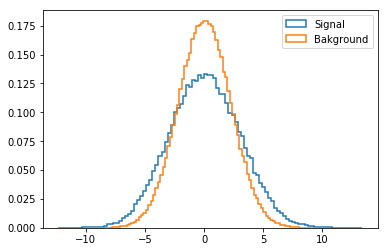

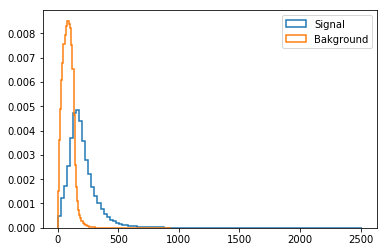

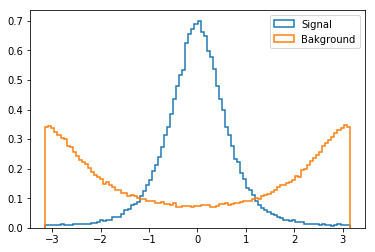

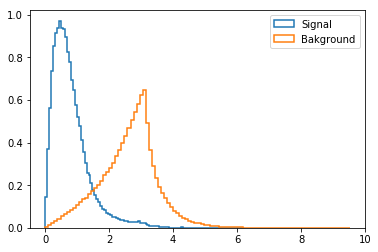

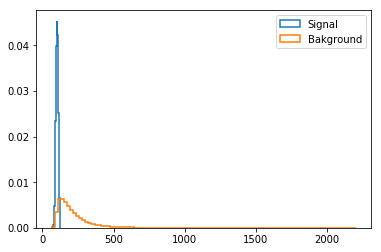

In [ ]:
for i in range(0,7):
    plt.hist(S[:,i],bins = 100, density = True,histtype = 'step', fill = False,linewidth = 1.5,label = 'Signal')
   # plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.hist(B[:,i],bins = 100, density = True,histtype = 'step', fill = False,linewidth = 1.5,label = 'Bakground')
    plt.legend()
    plt.show()

# Correlation matrix

Seaborn permits to visualize the heatmap of a matrix exploiting the method <code>sns.heatmap()</code>. We will compute the correlation matrix through the pandas library.

### Signal

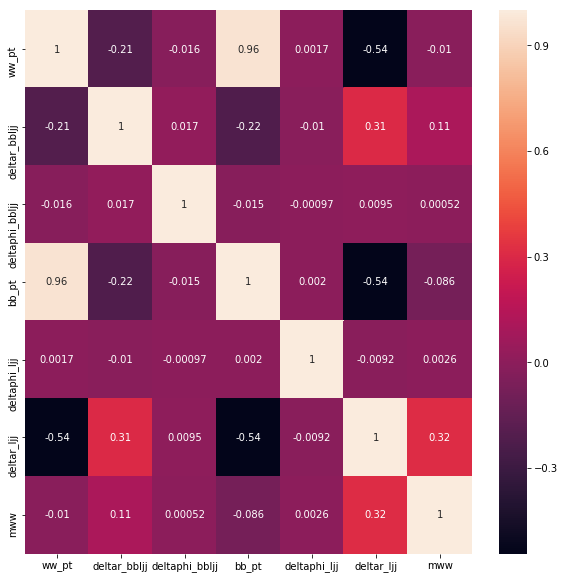

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(S[:,0:-1],columns = S_header).corr(), annot = True)

### Background

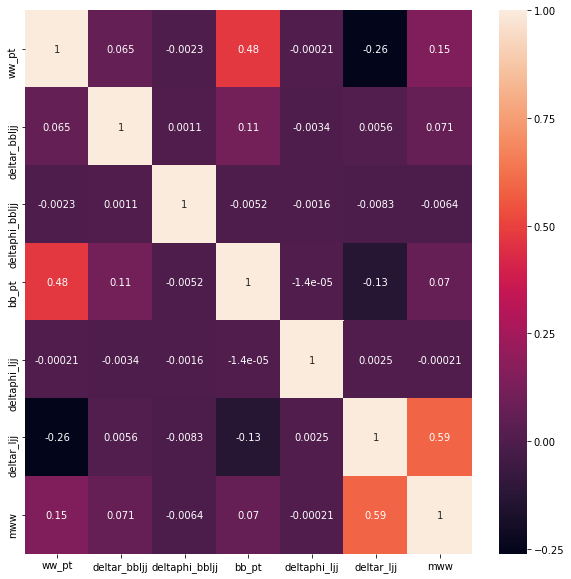

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(B[:,0:-1],columns = B_header).corr(), annot = True)

### Split the dataset in train and validation

The best thing to do is to create three different dataset. The train one, the validation one and the test one. The validation dataset is need for the correct tuning of the hyperparameters, while the test one is for the last step, the prediction. Indeed,  the test dataset is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset. If the data in the test dataset has never been used in training (for example in cross-validation), the test dataset is also called a holdout dataset. 
Sklearn doesn't provide a method for the split in three different dataset, but we can write a small function for this purpose.

In [ ]:
import sklearn

def data_split(examples, labels, train_frac, random_state=None):
    ''' https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    param data:       Data to be split
    param train_frac: Ratio of train set to whole dataset

    Randomly split dataset, based on these ratios:
        'train': train_frac
        'valid': (1-train_frac) / 2
        'test':  (1-train_frac) / 2

    Eg: passing train_frac=0.8 gives a 80% / 10% / 10% split
    '''

    assert train_frac >= 0 and train_frac <= 1, "Invalid training set fraction"

    X_train, X_tmp, Y_train, Y_tmp = sklearn.model_selection.train_test_split(
                                        examples, labels, train_size=train_frac, random_state=random_state)

    X_val, X_test, Y_val, Y_test   = sklearn.model_selection.train_test_split(
                                        X_tmp, Y_tmp, train_size=0.5, random_state=random_state)

    return X_train, X_val, X_test,  Y_train, Y_val, Y_test

In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = data_split(train, target, 0.6)

/home/wahid/Programs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Preprocessing

Let's start with the standardization of the train dataset

In [ ]:
scaler = StandardScaler(copy = False, with_mean = True, with_std = True)
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


In [ ]:
# keras imports
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, Flatten
from keras.utils import plot_model
from keras import backend as K
from keras import metrics
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [ ]:
input_shape = x_train.shape[1]
dropoutRate = 0.1
print("Input_shape: ",(input_shape))



Input_shape:  7


In [ ]:
#### Using the API ####
inputArray = Input(shape=(input_shape,))
#
x = Dense(100, activation='relu')(inputArray) #Input layer
x = Dropout(dropoutRate)(x)
#
x = Dense(100, activation='relu')(x) #1st hidden layer
x = Dropout(dropoutRate)(x)
#
x = Dense(100, activation='relu')(x)# 2nd hidden layer
x = Dropout(dropoutRate)(x)
#
x = Dense(100, activation='relu')(x)#3rd hidden layer
#
output = Dense(1, activation='sigmoid')(x) #output layer, Note: binary-classification -> 1 output neuron, sigmoid.
####
model = Model(inputs=inputArray, outputs=output) #Creating the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#Compiling the model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

In [ ]:
batch_size = 128
n_epochs = 50

We can set some regularization. In this case we will use the <code>EarlyStopping</code> which stops the training when the validation loss function doesn't decrease within a threshold fixed by the user for a fixed number of epochs (patience). The <code>EarlyStopping</code> is important in order to avoid the overtraining. 
A second type of Regularization is the <code>ReduceLROnPlateu</code> and works as follow: when the validation loss stop decreasing within a threshold the model try to improve the level of training reducing the learning rate. The purpose of that is to get as close as possible to the real minima in order to tune the hyperparameters properly.
Then we have the last callback, <code>TerminateOnNaN()</code> that terminates the training when a NaN loss is encountered.

In [ ]:
# train 
#tf.reset_default_graph()
with tf.Session() as ker: #Session only because there are different graphs instantiate before.
                      #If they don't exist you don't have to start a new session.
    
    
    history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 1,
                    validation_data=(x_val, y_val),
                    callbacks = [
                    EarlyStopping(monitor='val_loss', patience=10, verbose=1), #Early stopping on validation loss
                    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                    TerminateOnNaN()]) #Reduce learning rate when the metric has stop improving

    pred = model.predict(x_test) #the inference step, note: the test dataset is passed.
 


Train on 182449 samples, validate on 60816 samples
Epoch 1/50
182449/182449 [==============================] - 7s 37us/step - loss: 0.0705 - acc: 0.9729 - val_loss: 0.0398 - val_acc: 0.9853
Epoch 2/50
182449/182449 [==============================] - 6s 31us/step - loss: 0.0416 - acc: 0.9847 - val_loss: 0.0334 - val_acc: 0.9881
Epoch 3/50
182449/182449 [==============================] - 6s 32us/step - loss: 0.0379 - acc: 0.9862 - val_loss: 0.0322 - val_acc: 0.9886
Epoch 4/50
182449/182449 [==============================] - 7s 37us/step - loss: 0.0359 - acc: 0.9871 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 5/50
 78720/182449 [===========>..................] - ETA: 3s - loss: 0.0350 - acc: 0.9873

In [ ]:
# plot training history
fig = plt.figure(figsize = (15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.yscale('log')
plt.title('Training History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
# plot training history
fig = plt.figure(figsize = (15,7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
#plt.yscale('log')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_pred = pred.reshape(-1)
y_pred = np.around(y_pred,0)
plot_confusion_matrix(y_test,y_pred,classes = [0,1],normalize=True) #NOTE: using the test dataset!

In [ ]:
response_S = []
response_B = []



for i in range(len(pred)):
    if(y_test[i] == 1):
        response_S.append(pred[i][0])
    else:
        response_B.append(pred[i][0])
        

A very important plot when studying a binary classification problem is the response of the network.

In [ ]:
fig = plt.figure( figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
plt.hist(response_S,bins = 100, label = 'Signal', alpha = 0.5)
plt.hist(response_B,bins = 100, label = 'Background', alpha = 0.5)
plt.title("Network response")
plt.xlabel("Network response")
plt.ylabel("Counts")
plt.legend()
plt.show()

## ROC Curve

AUC (area under the curve) - ROC (Receiver operating characteristic) curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR (true positive rate) against the FPR (false positive rate) where TPR is on y-axis and FPR is on the x-axis.

$$TPR = \frac{TP}{TP + FN}$$


$$FPR =\frac{FP}{TN + FP} $$

A simple explanation of the ROC curve and its interpretation can be found here: <a href="https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5/"> ROC-AUC </a>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test,pred)
score = roc_auc_score(y_test,pred)

In [ ]:
plt.figure(figsize = (10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Grid search

The choice of the model parameter can be very important. In order to try different combinations of parameters in a simple way, scikit learn provides the GridSearchCV methods. Note: computationally speaking is very expansive! It can take a lot of hours!

In [ ]:
import multiprocessing
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#Defining a function that returns a built model. The sintax adopted is a little bit different -> is just for example.
def create_model(n_layer ,neurons, activation, optimizer = "adam"):
    
    model = Sequential()
    
    model.add(Dense(neurons, input_dim = input_shape, activation = activation))
    
    for i in range(0,n_layer):         
        
         model.add(Dense(neurons, activation = activation))            
        
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics=['acc'])

    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = KerasClassifier(build_fn = create_model, verbose = 1)


early_stop = EarlyStopping(monitor = "val_loss" ,min_delta=1e-8, patience=3, verbose=1, mode='auto')

#The following ranges are small! Is just for example!

epochs = [i for i in range(100,140,20)]
neurons = [i for i in range(3,4)]
n_layers = [i for i in range(1,2)]


#The gridsearch method needs a dictionary!
#The activatin functions and the optimizers available can be found on the keras website!
activation = ["relu","tanh"] 
optimizer = ["adam"]
param_grid = {'epochs': epochs,
              'n_layer':n_layers,
              'neurons':neurons,
              'activation':activation,
               'optimizer': optimizer}

#n_jobs stands for the number of cores that will be used, cv stands for cross-validation!
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = 4, verbose = 1, cv = 2)

In [ ]:
with tf.Session() as ker2:
    grid_result = grid.fit(x_train,y_train, verbose = 1,validation_data=(x_val,y_val), callbacks = [
                    early_stop, #Early stopping on validation loss
                    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                    TerminateOnNaN()] )

Note: if the notebook was opened from a shell, sometimes the output of the training is printed in the shell instead of in the notebook

Let's have a look on the best parameters found by the grid search

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
ep_best = grid_result.best_params_["epochs"]
nrn_best = grid_result.best_params_["neurons"]
activ = grid_result.best_params_["activation"]
lay = grid_result.best_params_["n_layer"]
optim = grid_result.best_params_["optimizer"]

model = create_model(lay,nrn_best,activ)

model.compile(loss = 'binary_crossentropy', optimizer = optim, metrics=['acc'])

with tf.Session() as ker_fin:
    history_cv = model.fit(x_train, y_train, epochs=ep_best, validation_data=(x_val, y_val))

#And then as before...

## Some useful references

<ul>
    <li> Hands-on Machine Learning with Scikit Learn and Tensorflow - Aditya Gupta </li>
    <li> Pattern Recognition and Machine Learning - Christopher Bishop (Theory) </li>
    <li> https://github.com/glouppe/info8010-deep-learning (Theory, Tensorflow, PyTorch)</li>